O exemplo deste notebook é uma implementação do exemplo do vídeo abaixo:

In [1]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/_L39rN6gz7Y" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Criação do conjunto de dados

In [3]:
# Criando o dataframe original
df = pd.DataFrame({
    "Dosage": [10, 20, 35, 5],
    "Age": [25, 73, 54, 12],
    "Sex": ["Female", "Male", "Female", "Male"],
    "DrugEffect": [98, 0, 6, 44]
})

In [4]:
# Adicionando mais dados fictícios para completar 10 amostras
new_data = {
    "Dosage": [15, 30, 40, 8, 25, 10],
    "Age": [33, 48, 65, 20, 36, 70],
    "Sex": ["Male", "Female", "Male", "Female", "Male", "Female"],
    "DrugEffect": [10, 50, 20, 30, 15, 5]
}
df = pd.concat([df, pd.DataFrame(new_data)], ignore_index=True)

In [5]:
df

,Dosage,Age,Sex,DrugEffect
0,10,25,Female,98
1,20,73,Male,0
2,35,54,Female,6
3,5,12,Male,44
4,15,33,Male,10
5,30,48,Female,50
6,40,65,Male,20
7,8,20,Female,30
8,25,36,Male,15
9,10,70,Female,5


# Separação dos dados

Separamos os dados categóricos dos dados numéricos. Os dados categóricos precisam ser codificados antes de serem utilizados no modelo.

Neste exemplo, se usa a codificação One-Hot.

Separação dos dados categóricos:

In [6]:
categorical_attribs = ["Sex"]
df_categorical = df[categorical_attribs]

In [7]:
df_categorical

,Sex
0,Female
1,Male
2,Female
3,Male
4,Male
5,Female
6,Male
7,Female
8,Male
9,Female


Codificação dos dados categóricos:

In [8]:
encoder = OneHotEncoder()

In [9]:
df_ohe = encoder.fit_transform(df_categorical).toarray()

In [10]:
df_ohe

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

Separação dos dados numéricos:

In [11]:
# Seleção dos atributos numéricos
df_num = df.drop(categorical_attribs, axis=1)

In [12]:
df_num

,Dosage,Age,DrugEffect
0,10,25,98
1,20,73,0
2,35,54,6
3,5,12,44
4,15,33,10
5,30,48,50
6,40,65,20
7,8,20,30
8,25,36,15
9,10,70,5


Concatenação dos dados categóricos e numéricos pós-codificação:

In [20]:
# Concatenando os atributos categóricos codificados com os atributos numéricos
X = pd.concat([pd.DataFrame(df_ohe), df_num.drop('DrugEffect', axis=1)], axis=1)
X = X.rename(columns={'Dosage': 3})
X = X.rename(columns={'Age': 4})

In [21]:
X

,0,1,3,4
0,1.0,0.0,10,25
1,0.0,1.0,20,73
2,1.0,0.0,35,54
3,0.0,1.0,5,12
4,0.0,1.0,15,33
5,1.0,0.0,30,48
6,0.0,1.0,40,65
7,1.0,0.0,8,20
8,0.0,1.0,25,36
9,1.0,0.0,10,70


Codificação do *label* (atributo que se quer prever)

In [22]:
label_encoder = LabelEncoder()

In [23]:
y = label_encoder.fit_transform(df["DrugEffect"])

In [24]:
y

array([9, 0, 2, 7, 3, 8, 5, 6, 4, 1])

# Criação do modelo

O modelo utilizado é uma árvore de decisão de classificação

In [25]:
clf = DecisionTreeClassifier()

Ajuste da árvore aos dados:

In [26]:
clf.fit(X, y)

DecisionTreeClassifier()

Visualização da árvore ajustada:

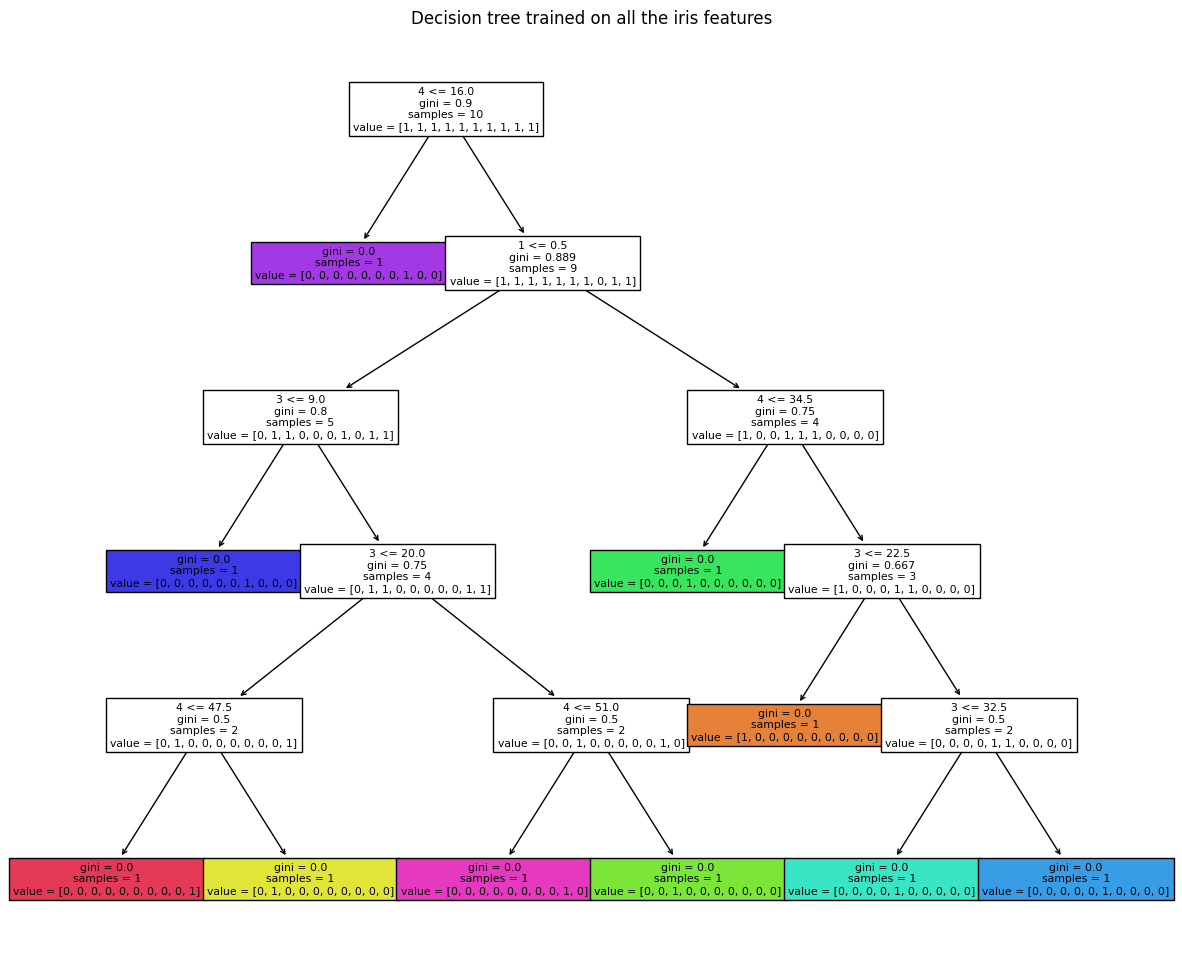

In [27]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=[15, 12])
plot_tree(clf, filled=True, feature_names=list(X.columns))
plt.title("Decision tree trained on all the iris features")
plt.show()

Previsão em dados desconhecidos:

In [32]:
print(clf.predict([[0.0, 15, 33, 20]]))

[3]
